In [1]:
using PyPlot
using WAV
using Base64
using Compat
using DSP
using Distributions
using FFTW
using LinearAlgebra



include("../functions/preprocessing.jl")
include("../functions/auxiliary/audioplayer.jl")
include("../functions/auxiliary/workflow.jl")
include("../functions/auxiliary/warpedfilter.jl")
include("../functions/auxiliary/fourier.jl")
;

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273


In [2]:
# signal preprocessing
sound_file = "../data/obama.wav"         # specify sound location
;

In [39]:
x, fs = wavread(sound_file, format="native")
fs = Int(fs)
x = x[20*fs+1:26*fs]
x = resample(x, 16000/fs)

println("fs: "*string(fs)*" Hz  ---  number of samples: "*string(length(x))*"  ---   duration: "*string(length(x)/fs)*" sec")
audioplayers(x/maximum(x), fs=16000)
;

<source src="data:audio/wav;base64,UklGRjzcBQBXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQDcBQBHYjE9MTmPvj4dvb5ZJW6+g955vUOEuz3da+89hhiVvdJ+L74k7bS9MbIDvsRgbb45jbe+w9G/vjkmNL6I5Sk9ywu1vC+/R72iEj077hycvPd9oDwhhW47X4NBvjrZSL4kClK9pl3qPTvlRz5jbR0+tuC5PWMCMz1LdmI9hS6sPH+Zmr3LmPK921Z8vHIIoD3SzwI+Ul+YPZCtlTwmsYS9R3e/vW0CUr03zQ686XkTvdbZaT1r+1Y+kpOIPv/6pT65KmI+j9yZvZYHpr4fTqw9fW6COpzCuj1BF54+NRiBPhHrIz4NdZw+nu7FPYPjiL4Vh3u+pachvqMEWbxmtN48cqkXPODsRL5quEe+WBDWvZOFNr50NoW+ICeuvv+ssr5fyQu+W5K0u0X3fL09uFi88oxYPfWJeD0OfhI+PG0kPc0/OL5wi0K+LZ6ovfguLz0dKsY9IcQbPpgz1D2b4KY9t5f6PVv3gD3somu9TpDFvfh8i72fuDi6yVqcPUSzNT1LOTS6rQsxvV2SxryBIvO7qd6QPLayzztCMLU9AbIoPg57dT6PTZY+KExZPsoqqL0gexO+5xgXPrr2tDvEUVs+H5uAPku06j0OORs+dluZPtDyLL2/0mK+a90+vsDqBb6iNzW8QL6NPRLcgb2EDH6+Y94fvpL8sr0HyPy9MEQevv3Pdb5a4Ym+qOuWvcGbeDwRC4G9pjZrve+WBr1+ATM9HU3bPQiLBb1mAEO+9qxmvlm3yr0CP4g99v/APcjp6j1ZCxQ+GLYrPrZEQj7ZVQs+gfAau6xXpb2IR1m9VSkFvKAUUjwI9Wa8ZxKHvUDft70YFSm9KDTBO5j4ND1OY3E97fkwPupCWj7rtok+loqQPvvJMT7ZaDu+h+vrvD/IUz2lhPQ78hOFPiRhFj7tBHE9APNjPhlwRT4dXCC+/BoJvhmIX77PZwW+6cw8PeEjQz0wfh6+3c5Hvlv7Gb61agy+3KkCvqB9Lr4p8Hy+7g84vs1SjbyZhGm9et/Avd3mmr3ajIq9GTZ+PNRKojy04aO9tOAovrMwEr5/tne8AsrZPSNVAT7n3yg+2rMWPq6QJT5JQjc+/l0/PWeWo701A7u9ClSlvVO4R73B+pS7lXusvBW4Nr3rPMG77cZSu5UPQz1vcgs+jtMZPkx5ST6dx1E+nG1tPlvMWD6/Edw9SoYhviAeDb0U92S9faYAPkzXgD5GcAY+UT8PPlFWXD7XN7k9PJQ9vaqMJ76L2pK+C0pBvZc5Pj2RdoK82Tb2vTVmPb5VEQ++UNyIvcOkz72s8lW+wfpvvg4mML4PRGW9HMidvVOqA749k/m930apvRfQizxVBZ886lqsvej+Ir5S98e98v1RvPzg1z2aoRA+LyvpPSFUqz1UDt49Tt13PX/XEr3lC9e9pC36vUNOgL2RQPk74/MGPdM2ujtoOt48yLSSPfJYjT0L2JQ94fCTPWOX9j3z+UM+pgpRPtMpPz5fBT4+XiXUPXBOk7yey8U8/G/ZvFuaHj7Xb2M+UEcuPmuSFj6lEf89g9+fPM6tBL1QGTO+okWCvn4Q072AmCm95Gs0vB5Olb389hu+2nysvZ/OFr3/x4e97hPgvUzfTL53ATm+w9uiva7TCr7+Vvi9KFzxvTTCi72rglU8qMkHPAGy073O5xm+KCADvhqtJb1fD0o9uPhwPWTiqT18S7E96YmlPVfDLz2qXz69d/e7veUxib1unQq95MPBPGUKEz1P7TM8X4pOPeQPuz39s9098J2UPXrTID3Ip5E9kQcbPpahJT4y6TY+v5sDPrlL4T2Bz289c1yMPf+DAj2FwrQ9vLXhPcwn1z3/zME9ZrkfPTvgJLsVkDm9/cO2vT8EtL0IRca85NepvP7Pszw56dE8KfU1u2vY1bzj5EG9rMBRvdiimb2cjLW9SsbHvT3C9r3G3R2+BaYCvsaQqr1D3q27qwdRPc39Ej2V0UG9P8Kovb65yr1fKqC9D7thveyqdb3seRm9cdHruxdfmDxesIa89b9+vV9jgb12ZzC9IdcivIQlQzzvoF28xSxau+fnIz29mlU9DV5LPe0mBD0D9J68gcVYvA+96zw/+xw9uCUaPa4yND28B1I9Y6ghPaKAAT2GK3C6k+u4vCj5mjtKol49OKyWPTKQoz0+02491T5qPQK9Zz2R1oY9QTenPcnyhD3GNh89uu8vPb5pFT3l7+w8v7eOuDZzhLzSUfW7kguOu+6dBDyjlJY7PUF9vKwcW7txtv08sST2PBXs5Twl2dk6wjQ5vTauxL3ZBre9Z2vMvYTmAL475eC9/lj1vblorr0McxO94mDHvAzjTb3IomG9enhNvY6sOr1tlhe9Bm7cvJnIH73BPja9FMX0vCQ5M70WHjW9Z8kmvU7o9bze7PK8rIUQvU8lCr0ubxy9I7kGvWasfrzkaYA8t1PRO6R42Tx0wg89DfgUPZEDMD3JNE09xIG1PQfLyT3Yfo49RplbPXZtTj0GbHU9MmCqPXuSlz1Ibm89CymhPVmcjD0qK5k9lximPQ80mT3+vnA9RTWKPS+vjj049GY9hC9VPfnmxDugEr68nKAavbbeCL0rZmq9DzmSvTjTq73Gx5m9+XV2vQLWK73quqa8NPKsvH5Ej7yITHG8o2nlvKvzNr25Hz+9ubavvdMcj70CTU+9NNYLvVt/xLyFJpC8k/SIvCrpVLy8wKq5rkMbvFeJ3Lxa2wq9aFTTvM2TGL38DWq95W19veirir314oO9MaIAvVBvhbt/KCQ8E0mtO6jdJbwBh+w6LV2aPOpS/DyNUdw8kYjoPOG4OD3erqw9Ld6pPTzVlj1/ht09JQDPPehh3z1o0N49l66+PTdnoz3E8Vs9Okg0PYkk+zzJjCY9Pcf6PJF+Jzya1zW8juawO3rv97pZzHi7y3erPLk5YDyjVNY7+0KYu8FPQ7wTnv286S8IvXVDNr2VMxy9qpRTvbs7Rr0AXVi9anNMvZ8OJb1TeCe9IEbIvN3tnLz32cC8q/4tvfoiTL1rK4a9hYSNvcXzUr1SGxW9mnGfvLirkrx2mr27w3zju1RSrbz0Eh29bwU1vW+9O730j169BjuWvQcRsb1e0YW9igr+vGF3hLyk6yI7fJQBPaPmQD24Y1M9MxeBPa7ppz39yKI9UFuWPchrjj19FYY9ubh+Pb3bcj1bRQk9IBfOPONeEj16tTQ9BZcuPWzRUj1JF1I93+/nPPSQ2DzNLmw9gOR+PcdsCD3FRYs8Q3X7PPV4Hj3cYBg9sdcaPOihrbyP9ry83L7qu6MxeLtLq++84uCQvYpas73Daae9yy56vXRxRr1ZbI294O6HvXGMUb0LZpm8LTV7PHtrsjwjOwo8JySIvJ1907wSaUm9NlB7vXohhL34o2e9SSCEvczfPb0BLf68MkhWvSiaHb0MGDy8B0uTu2NTGbyGSFq8LFPPvLMpiryWckq7pXKSPFYTm7uuVd+7T81hOX56VTwqdQY9f5GlPDxnnjwBsg09sIK+PV3F1T3jP+E9eibVPcj8pj2ey5g9xWODPZc+Oj1HAJI8hxCWus0/XrymRQO88wNtPFj53zziqMw84mfQPJF8mTxbimA8PwQpPOyShrskkoq82eDWvMfL1LxGMYm82J3jO0kgHrz6DbO8qweZvGzRYrzLhKm8y10MvQCJg71AwIG9xc8bvT+tp7yPRSK8Mhheu8EhZDw0p2E8GI3xPCHoujy5VIa8kmZKvfgrYb3NpKK92mCevfpajL3aVay9KQ2xvatHor2n2Tm9+D3KvGD7sLsgyEU8iE6jPA+VXz2ef6k9l3uRPfp5hD0gbIM9k3h+PeXPfz2S+H49v4EMPWd9GD0hwHM9MeGCPYYBZj2Xh

fs: 44100 Hz  ---  number of samples: 96000  ---   duration: 2.17687074829932 sec


In [23]:
function μ_law_companding(x, μ)
    return sign.(x) .* log.(1 .+ μ*abs.(x)) / log(1 + μ)
end

function μ_law_expansion(x, μ)
    return sign.(x) .* (1 / μ) .* ( (1 .+ μ).^abs.(x) .- 1 )
end
;

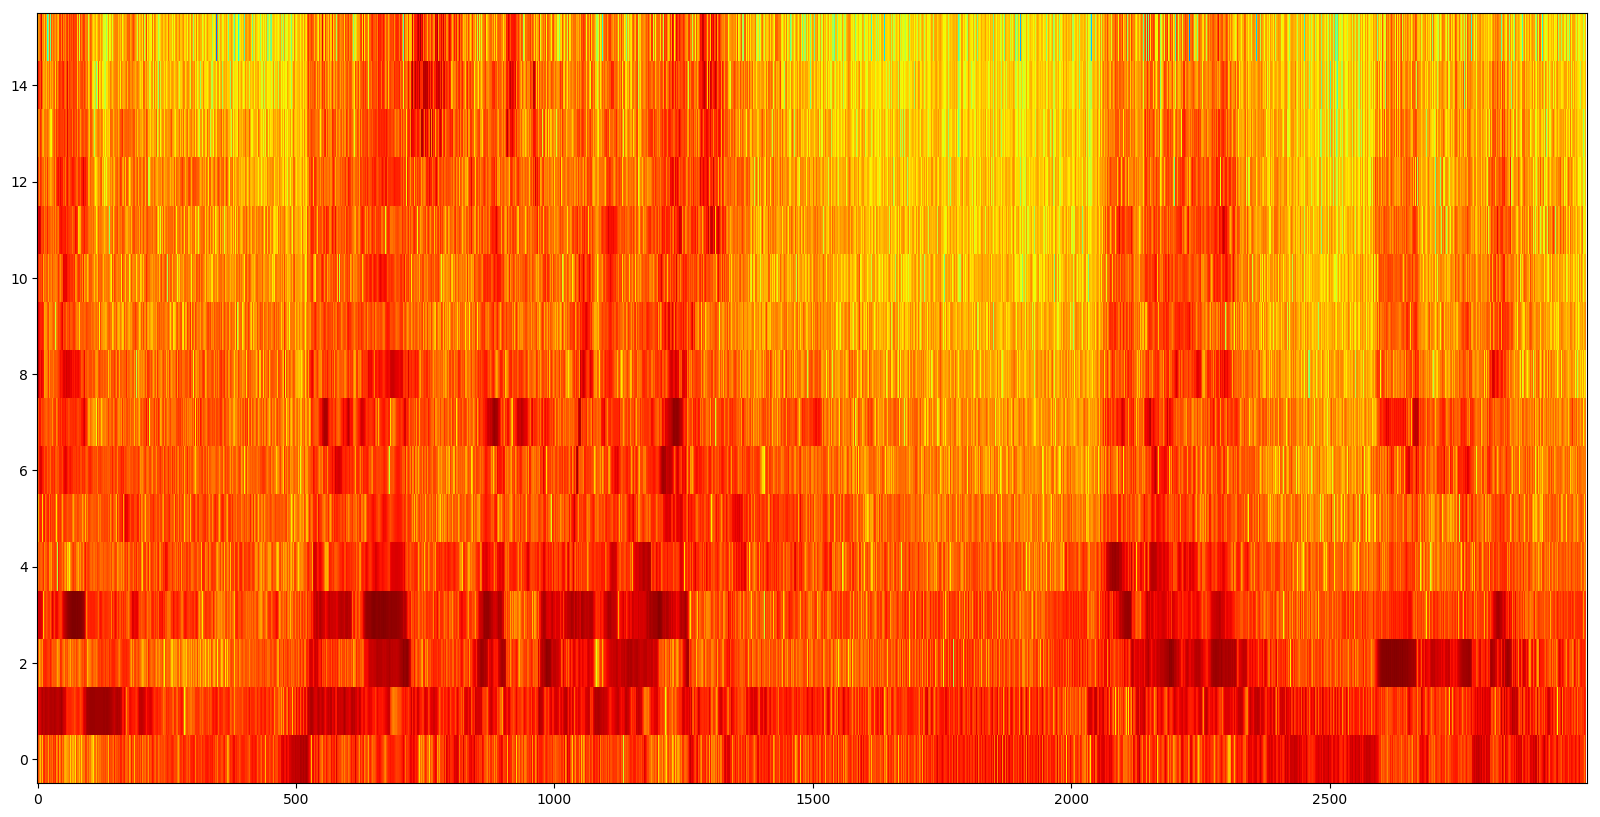

PyObject <matplotlib.image.AxesImage object at 0x0000000002242FD0>

In [24]:
x_μ = μ_law_companding(x./maximum(x), 255)

fwx_μ = warp_fft(x_μ, 0.5756, 32, step_size=32)
plt.figure(figsize=(20,10))
imshow(log.(abs.(twosided2singlesided(fwx_μ)))',
    aspect="auto",
               cmap="jet",
               origin="lower")
              # extent=[ last(spec.time), last(spec.freq), first(spec.freq)])

In [25]:
y = simplify(log.(abs.(x)))

nr_clusters = 2

function GMM_initialize(nr_clusters::Int)
    μ = exp.(randn(nr_clusters))
    σ = exp.(randn(nr_clusters))
    πi = ones(nr_clusters)./nr_clusters
    return μ, σ, πi
end

function GMM_E(y, μ, σ, πi)
    γ = hcat([πi[k]*Gaussian(y, μ[k], σ[k]) for k = 1:length(πi)]...)
    return γ ./ sum(γ, dims=2)
end

function GMM_M(y, γ)
    μ = squeeze(collect(y'*γ))./squeeze(sum(γ,dims=1))
    σ = sqrt.([sum(γ[:,k].*abs2.(y .- μ[k]) ) for k = 1:size(γ,2)]./squeeze(sum(γ,dims=1)))
    πi = squeeze(sum(γ, dims=1)/length(y))
    return μ, σ, πi
end

function GMM_EM(y, μ, σ, πi)
    γ = GMM_E(y, μ, σ, πi)
    μ, σ, πi = GMM_M(y, γ)
    return μ, σ, πi
end

function GMM_update(y, μ, σ, πi, iterations)
    for _ = 1 : iterations
        μ, σ, πi = GMM_EM(y, μ, σ, πi)
    end
    return μ, σ, πi 
end

function GMM_fit(y, nr_clusters, iterations)
    μ, σ, πi = GMM_initialize(nr_clusters)
    return GMM_update(y, μ, σ, πi, iterations)
end

Gaussian(x, μ, σ) = 1/sqrt(2*pi*σ^2)*exp.(-(x .-μ).^2/(2*σ^2))

#μ, σ, πi = GMM_fit(y, 2, 100)

Gaussian (generic function with 1 method)

In [26]:
function GMM_initialize(nr_clusters::Int, dim::Int)
    μ = [randn(dim)/1000 for k = 1:nr_clusters]
    Σ = [1e5*Ic(dim) for k = 1:nr_clusters]
    πi = [1/nr_clusters for k = 1:nr_clusters]
    return μ, Σ, πi
end

GMM_initialize (generic function with 2 methods)

In [27]:
μ, Σ, πi = GMM_initialize(2, size(fwx_μ,2))

(Array{Float64,1}[[-0.000955542451495958, 0.0007069622798180524, -0.00085839535701393, 0.0004528202872592197, 0.001167612951155924, 0.0006028929360984922, 7.944115404392581e-5, -0.0003601271164380687, -0.0018801087524102117, 0.0011367766553468648  …  -0.001429239332515047, 0.0003396744598230135, -0.0025339801267754477, 0.002358957195964133, -0.00017815500278651585, -0.000867180868524032, 0.0002938666091098877, 0.002038058120006267, 0.0012347369594807292, 0.0012531686839906157], [0.0005906476082520247, -0.0008104852023027667, -0.0005390385598449076, 0.0006055953174202302, -1.063566243267912e-5, 0.00021252695313756577, 0.00017639677176127243, 4.995598969201589e-5, 0.0010640689082726071, -0.0006927553994585079  …  -0.0013750519626606374, -0.0006705417669089341, -0.0005515061936418838, 0.0006174167946052846, -6.318376466502467e-5, 0.0004120938100911421, 0.0004944954448209421, 0.0003677254891531848, -0.001356330433118967, -1.6035694043366108e-5]], Array{Float64,2}[[100000.0 0.0 … 0.0 0.0; 0

In [28]:
function GMM_MvGaussian_Single(x, μ, Σ)
    return exp.(-0.5*(x .- μ)'*inv(Σ)*(x .- μ))/sqrt((2*pi)^length(μ)*det(Σ))
end
function GMM_MvGaussian(x, μ, Σ)
    return [GMM_MvGaussian_Single(x[k,:], μ, Σ) for k = 1:size(x,1)] 
end

GMM_MvGaussian (generic function with 1 method)

In [29]:
function GMM_E(x, μ, Σ, πi)
    γ = [πi[k]*GMM_MvGaussian(x, μ[k], Σ[k]) for k = 1:length(πi)]
    return [γ[k] ./ sum(hcat(γ...), dims=2) for k = 1:length(γ)]
end

GMM_E (generic function with 1 method)

In [30]:
function GMM_M(x, γ)
    μ = [z'*γ[k]/sum(γ[k]) for k=1:length(γ)]
    Σ = [sum([γ[k][ki]*z[ki,:]*z[ki,:]' for ki = 1:size(z,1)])./sum([γ[k][ki] for ki = 1:size(z,1)]) for k = 1:length(γ)]
    πi = [sum(γ[k])/length(γ[k]) for k = 1:length(γ)]
    return μ, Σ, πi
end

GMM_M (generic function with 1 method)

In [31]:
z = abs.(fwx_μ)
μ, Σ, πi = GMM_initialize(2, size(z,2))
for k = 1:30
    γ = GMM_E(z, μ, Σ, πi)
    μ, Σ, πi = GMM_M(z, γ)
end

SingularException: SingularException(31)

In [32]:
Σ

2-element Array{Array{Float64,2},1}:
 [2.9103385049146993 3.5522521658791266 … 4.736846953973781 3.5522521658791266; 3.5522521658791266 8.18812164801663 … 7.713167634092161 8.18812164801663; … ; 4.736846953973781 7.713167634092159 … 15.614890262768375 7.713167634092159; 3.5522521658791266 8.18812164801663 … 7.713167634092161 8.18812164801663]
 [2.9103385359125373 3.5522521491994055 … 4.736846993474485 3.5522521491994055; 3.5522521491994055 8.188121511115567 … 7.71316758839112 8.188121511115567; … ; 4.736846993474485 7.71316758839112 … 15.61489034262232 7.71316758839112; 3.5522521491994055 8.188121511115567 … 7.71316758839112 8.188121511115567] 

In [33]:
using GaussianMixtures
using Distributions

In [74]:
z = real.(fwx_μ)[:,17:end]
g = GMM(2, z, kind=:full)
p = GMMprior(g.d, 0.1, 1.0)  ## set α0=0.1 and β0=1, and other values to a default
v = VGMM(g, p) ## initialize variational GMM v with g
em!(v, z)


  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.025078e+05
      1       8.249177e+04      -2.001601e+04 |        2
      2       8.012559e+04      -2.366186e+03 |        2
      3       7.985738e+04      -2.682068e+02 |        2
      4       7.980972e+04      -4.765491e+01 |        2
      5       7.974872e+04      -6.100489e+01 |        2
      6       7.970440e+04      -4.431887e+01 |        2
      7       7.967466e+04      -2.974459e+01 |        2
      8       7.966347e+04      -1.118027e+01 |        2
      9       7.965858e+04      -4.891237e+00 |        2
     10       7.965441e+04      -4.173219e+00 |        2
     11       7.965062e+04      -3.789563e+00 |        2
     12       7.964682e+04      -3.802670e+00 |        2
     13       7.963728e+04      -9.542305e+00 |        2
     14       7.962221e+04      -1.506351e+01 |        2
     15       7.960241e+04      -1.980061e+01 |        

┌ Info: Initializing GMM, 2 Gaussians diag covariance 16 dimensions using 2999 data points
└ @ GaussianMixtures C:\Users\s151781\.julia\packages\GaussianMixtures\3jRIL\src\train.jl:78


┌ Info: K-means with 2000 data points using 50 iterations
│ 58.8 data points per parameter
└ @ GaussianMixtures C:\Users\s151781\.julia\packages\GaussianMixtures\3jRIL\src\train.jl:139


50-element Array{Float64,1}:
 -1.3919213726009225
 -1.3919708394284738
 -1.392011299540408 
 -1.3920435796400183
 -1.3920687673200542
 -1.3920880776217825
 -1.3921027108751265
 -1.392113725140904 
 -1.3921219852220001
 -1.3921281681596216
 -1.3921327919250708
 -1.3921362481015624
 -1.3921388309492038
  ⋮                 
 -1.3921464602104854
 -1.3921464611960823
 -1.3921464619324275
 -1.3921464624825506
 -1.3921464628935478
 -1.3921464632006093
 -1.392146463430013 
 -1.3921464636014016
 -1.3921464637294456
 -1.3921464638251098
 -1.392146463896577 
 -1.392146463949974 

In [75]:
p =gmmposterior(g , z)[1]

2999×2 Array{Float64,2}:
 1.0         5.98483e-72 
 1.0         1.8165e-292 
 1.0         6.24716e-221
 1.0         3.69619e-183
 1.0         1.22695e-18 
 1.0         8.74984e-100
 1.0         1.75166e-29 
 1.0         1.58546e-124
 1.0         0.0         
 1.0         3.21795e-177
 1.0         2.93555e-51 
 1.0         3.94903e-72 
 1.0         7.63012e-24 
 ⋮                       
 1.46233e-6  0.999999    
 8.83994e-7  0.999999    
 2.11675e-7  1.0         
 3.53806e-7  1.0         
 2.12615e-7  1.0         
 8.47843e-8  1.0         
 2.83446e-7  1.0         
 4.57005e-8  1.0         
 1.88148e-7  1.0         
 2.4364e-7   1.0         
 2.30166e-7  1.0         
 1.61037e-8  1.0         

<source src="data:audio/wav;base64,UklGRjzcBQBXQVZFZm10ICgAAAD+/wEAgD4AAAD6AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQDcBQBHYjE9MTmPvj4dvb5ZJW6+g955vUOEuz3da+89hhiVvdJ+L74k7bS9MbIDvsRgbb45jbe+w9G/vjkmNL6I5Sk9ywu1vC+/R72iEj077hycvPd9oDwhhW47X4NBvjrZSL4kClK9pl3qPTvlRz5jbR0+tuC5PWMCMz1LdmI9hS6sPH+Zmr3LmPK921Z8vHIIoD3SzwI+Ul+YPZCtlTwmsYS9R3e/vW0CUr03zQ686XkTvdbZaT1r+1Y+kpOIPv/6pT65KmI+j9yZvZYHpr4fTqw9fW6COpzCuj1BF54+NRiBPhHrIz4NdZw+nu7FPYPjiL4Vh3u+pachvqMEWbxmtN48cqkXPODsRL5quEe+WBDWvZOFNr50NoW+ICeuvv+ssr5fyQu+W5K0u0X3fL09uFi88oxYPfWJeD0OfhI+PG0kPc0/OL5wi0K+LZ6ovfguLz0dKsY9IcQbPpgz1D2b4KY9t5f6PVv3gD3somu9TpDFvfh8i72fuDi6yVqcPUSzNT1LOTS6rQsxvV2SxryBIvO7qd6QPLayzztCMLU9AbIoPg57dT6PTZY+KExZPsoqqL0gexO+5xgXPrr2tDvEUVs+H5uAPku06j0OORs+dluZPtDyLL2/0mK+a90+vsDqBb6iNzW8QL6NPRLcgb2EDH6+Y94fvpL8sr0HyPy9MEQevv3Pdb5a4Ym+qOuWvcGbeDwRC4G9pjZrve+WBr1+ATM9HU3bPQiLBb1mAEO+9qxmvlm3yr0CP4g99v/APcjp6j1ZCxQ+GLYrPrZEQj7ZVQs+gfAau6xXpb2IR1m9VSkFvKAUUjwI9Wa8ZxKHvUDft70YFSm9KDTBO5j4ND1OY3E97fkwPupCWj7rtok+loqQPvvJMT7ZaDu+h+vrvD/IUz2lhPQ78hOFPiRhFj7tBHE9APNjPhlwRT4dXCC+/BoJvhmIX77PZwW+6cw8PeEjQz0wfh6+3c5Hvlv7Gb61agy+3KkCvqB9Lr4p8Hy+7g84vs1SjbyZhGm9et/Avd3mmr3ajIq9GTZ+PNRKojy04aO9tOAovrMwEr5/tne8AsrZPSNVAT7n3yg+2rMWPq6QJT5JQjc+/l0/PWeWo701A7u9ClSlvVO4R73B+pS7lXusvBW4Nr3rPMG77cZSu5UPQz1vcgs+jtMZPkx5ST6dx1E+nG1tPlvMWD6/Edw9SoYhviAeDb0U92S9faYAPkzXgD5GcAY+UT8PPlFWXD7XN7k9PJQ9vaqMJ76L2pK+C0pBvZc5Pj2RdoK82Tb2vTVmPb5VEQ++UNyIvcOkz72s8lW+wfpvvg4mML4PRGW9HMidvVOqA749k/m930apvRfQizxVBZ886lqsvej+Ir5S98e98v1RvPzg1z2aoRA+LyvpPSFUqz1UDt49Tt13PX/XEr3lC9e9pC36vUNOgL2RQPk74/MGPdM2ujtoOt48yLSSPfJYjT0L2JQ94fCTPWOX9j3z+UM+pgpRPtMpPz5fBT4+XiXUPXBOk7yey8U8/G/ZvFuaHj7Xb2M+UEcuPmuSFj6lEf89g9+fPM6tBL1QGTO+okWCvn4Q072AmCm95Gs0vB5Olb389hu+2nysvZ/OFr3/x4e97hPgvUzfTL53ATm+w9uiva7TCr7+Vvi9KFzxvTTCi72rglU8qMkHPAGy073O5xm+KCADvhqtJb1fD0o9uPhwPWTiqT18S7E96YmlPVfDLz2qXz69d/e7veUxib1unQq95MPBPGUKEz1P7TM8X4pOPeQPuz39s9098J2UPXrTID3Ip5E9kQcbPpahJT4y6TY+v5sDPrlL4T2Bz289c1yMPf+DAj2FwrQ9vLXhPcwn1z3/zME9ZrkfPTvgJLsVkDm9/cO2vT8EtL0IRca85NepvP7Pszw56dE8KfU1u2vY1bzj5EG9rMBRvdiimb2cjLW9SsbHvT3C9r3G3R2+BaYCvsaQqr1D3q27qwdRPc39Ej2V0UG9P8Kovb65yr1fKqC9D7thveyqdb3seRm9cdHruxdfmDxesIa89b9+vV9jgb12ZzC9IdcivIQlQzzvoF28xSxau+fnIz29mlU9DV5LPe0mBD0D9J68gcVYvA+96zw/+xw9uCUaPa4yND28B1I9Y6ghPaKAAT2GK3C6k+u4vCj5mjtKol49OKyWPTKQoz0+02491T5qPQK9Zz2R1oY9QTenPcnyhD3GNh89uu8vPb5pFT3l7+w8v7eOuDZzhLzSUfW7kguOu+6dBDyjlJY7PUF9vKwcW7txtv08sST2PBXs5Twl2dk6wjQ5vTauxL3ZBre9Z2vMvYTmAL475eC9/lj1vblorr0McxO94mDHvAzjTb3IomG9enhNvY6sOr1tlhe9Bm7cvJnIH73BPja9FMX0vCQ5M70WHjW9Z8kmvU7o9bze7PK8rIUQvU8lCr0ubxy9I7kGvWasfrzkaYA8t1PRO6R42Tx0wg89DfgUPZEDMD3JNE09xIG1PQfLyT3Yfo49RplbPXZtTj0GbHU9MmCqPXuSlz1Ibm89CymhPVmcjD0qK5k9lximPQ80mT3+vnA9RTWKPS+vjj049GY9hC9VPfnmxDugEr68nKAavbbeCL0rZmq9DzmSvTjTq73Gx5m9+XV2vQLWK73quqa8NPKsvH5Ej7yITHG8o2nlvKvzNr25Hz+9ubavvdMcj70CTU+9NNYLvVt/xLyFJpC8k/SIvCrpVLy8wKq5rkMbvFeJ3Lxa2wq9aFTTvM2TGL38DWq95W19veirir314oO9MaIAvVBvhbt/KCQ8E0mtO6jdJbwBh+w6LV2aPOpS/DyNUdw8kYjoPOG4OD3erqw9Ld6pPTzVlj1/ht09JQDPPehh3z1o0N49l66+PTdnoz3E8Vs9Okg0PYkk+zzJjCY9Pcf6PJF+Jzya1zW8juawO3rv97pZzHi7y3erPLk5YDyjVNY7+0KYu8FPQ7wTnv286S8IvXVDNr2VMxy9qpRTvbs7Rr0AXVi9anNMvZ8OJb1TeCe9IEbIvN3tnLz32cC8q/4tvfoiTL1rK4a9hYSNvcXzUr1SGxW9mnGfvLirkrx2mr27w3zju1RSrbz0Eh29bwU1vW+9O730j169BjuWvQcRsb1e0YW9igr+vGF3hLyk6yI7fJQBPaPmQD24Y1M9MxeBPa7ppz39yKI9UFuWPchrjj19FYY9ubh+Pb3bcj1bRQk9IBfOPONeEj16tTQ9BZcuPWzRUj1JF1I93+/nPPSQ2DzNLmw9gOR+PcdsCD3FRYs8Q3X7PPV4Hj3cYBg9sdcaPOihrbyP9ry83L7qu6MxeLtLq++84uCQvYpas73Daae9yy56vXRxRr1ZbI294O6HvXGMUb0LZpm8LTV7PHtrsjwjOwo8JySIvJ1907wSaUm9NlB7vXohhL34o2e9SSCEvczfPb0BLf68MkhWvSiaHb0MGDy8B0uTu2NTGbyGSFq8LFPPvLMpiryWckq7pXKSPFYTm7uuVd+7T81hOX56VTwqdQY9f5GlPDxnnjwBsg09sIK+PV3F1T3jP+E9eibVPcj8pj2ey5g9xWODPZc+Oj1HAJI8hxCWus0/XrymRQO88wNtPFj53zziqMw84mfQPJF8mTxbimA8PwQpPOyShrskkoq82eDWvMfL1LxGMYm82J3jO0kgHrz6DbO8qweZvGzRYrzLhKm8y10MvQCJg71AwIG9xc8bvT+tp7yPRSK8Mhheu8EhZDw0p2E8GI3xPCHoujy5VIa8kmZKvfgrYb3NpKK92mCevfpajL3aVay9KQ2xvatHor2n2Tm9+D3KvGD7sLsgyEU8iE6jPA+VXz2ef6k9l3uRPfp5hD0gbIM9k3h+PeXPfz2S+H49v4EMPWd9GD0hwHM9MeGCPYYBZj2Xh

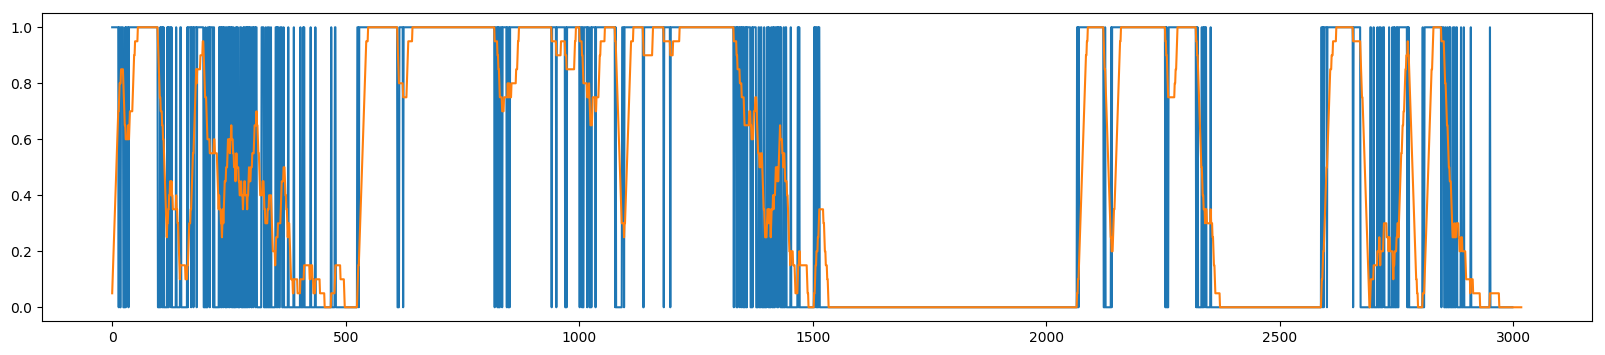

In [76]:
plt.figure(figsize=(20,4))
mask = 1.0*(p[:,1] .> p[:,2])
mask_smooth = conv(mask, ones(20)/20)
plt.plot(mask)
plt.plot(mask_smooth)
mask_smooth2 = conv(repeat(mask_smooth, inner=32), ones(50)/50)
xi = mask_smooth2[1:length(x)].*x/maximum(x)
audioplayers(x/maximum(x), xi, 0.5*x/maximum(x) + 0.5*xi, fs=16000)

In [77]:
mask_smooth2 = conv(repeat(mask_smooth, inner=32), ones(50)/50)

96625-element Array{Float64,1}:
  0.0009999999999999454 
  0.0020000000000000018 
  0.002999999999999836  
  0.004000000000000115  
  0.004999999999999893  
  0.005999999999999894  
  0.006999999999999895  
  0.007999999999999896  
  0.008999999999999897  
  0.009999999999999898  
  0.010999999999999843  
  0.011999999999999955  
  0.012999999999999956  
  ⋮                     
 -8.326672684688675e-19 
 -7.632783294297953e-19 
 -6.938893903907228e-19 
 -6.245004513516506e-19 
 -5.551115123125786e-19 
 -4.857225732735063e-19 
 -4.163336342344334e-19 
 -3.4694469519536134e-19
 -2.775557561562892e-19 
 -2.0816681711721684e-19
 -1.387778780781445e-19 
 -6.938893903907196e-20 

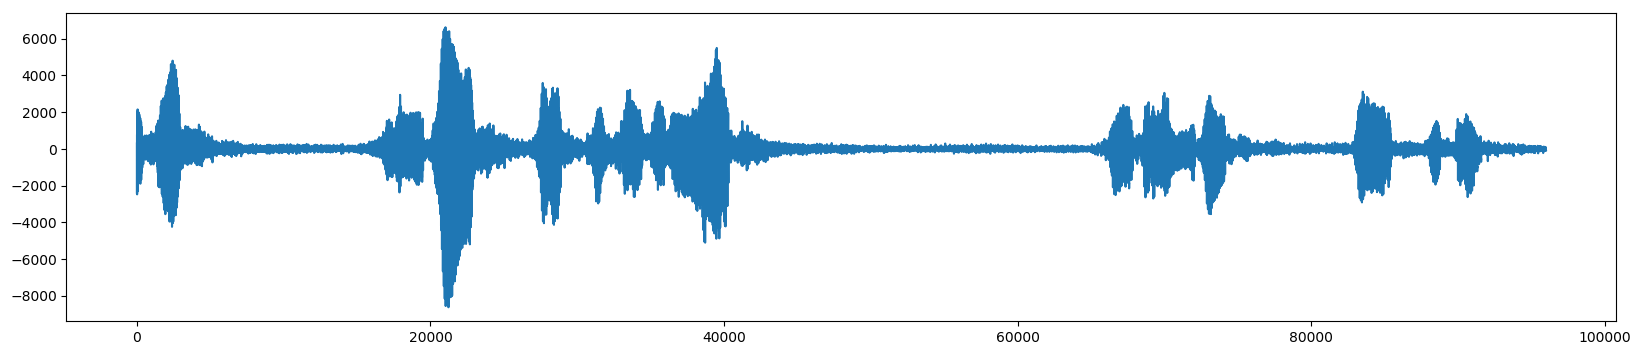

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000004B3E898>

In [78]:
plt.figure(figsize=(20,4))
plt.plot(x)

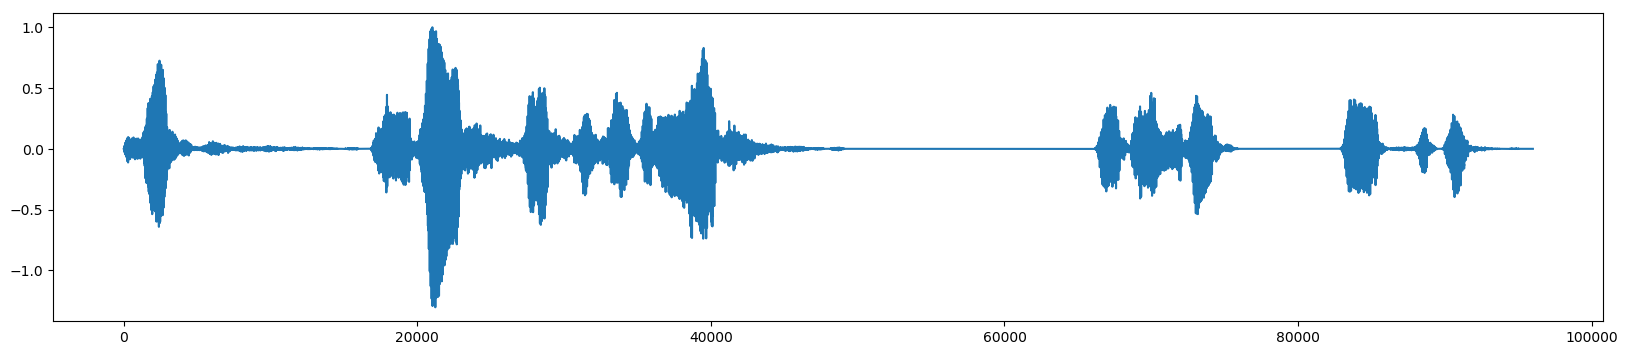

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000004BA40B8>

In [79]:
plt.figure(figsize=(20,4))
plt.plot(xi)

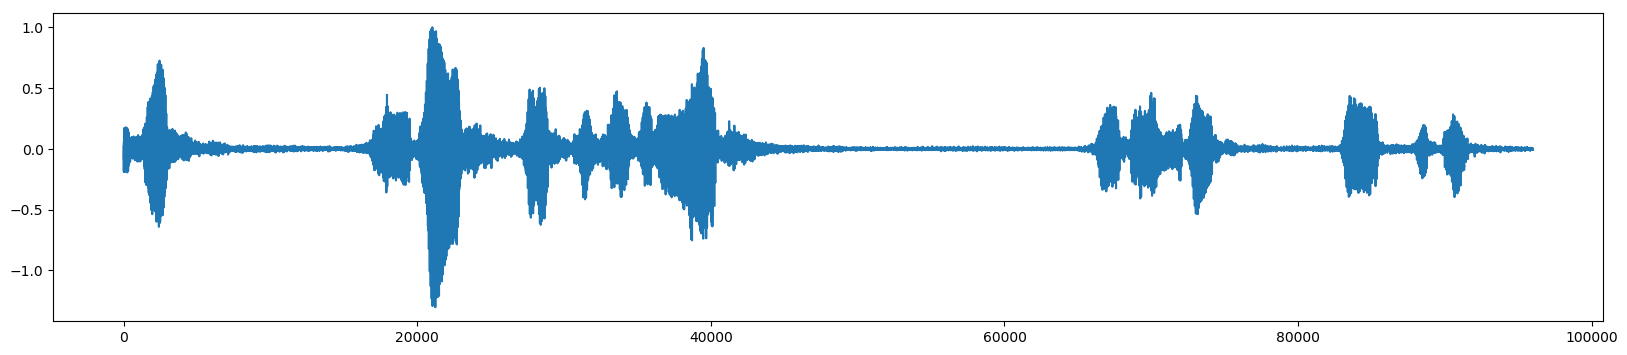

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000004BF5A90>

In [80]:
plt.figure(figsize=(20,4))
plt.plot(0.5*x/maximum(x) + 0.5*xi)

In [83]:
weights(g)

2-element Array{Float64,1}:
 0.4849994624143999
 0.5150005375856002